In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [ ]:
df = pd.read_csv('nhanes_2015_2016.csv')
df.shape
df.head()

print(df['RIDAGEYR'].head(10))

0    62
1    53
2    78
3    56
4    42
5    72
6    22
7    32
8    18
9    56
Name: RIDAGEYR, dtype: int64


In [ ]:
#1 Media BMI
media = df['BMXBMI'].mean()
print('Media', media)
mediana = df['BMXBMI'].median()
print('Mediana', mediana)
moda = df['BMXBMI'].mode()
print('Moda', moda)

Media 29.382197103497
Mediana 28.3
Moda 0    29.1
Name: BMXBMI, dtype: float64


In [ ]:
#2 media BMI maiores de 18 anos
df18 = df[df['RIDAGEYR'] >= 18]
df18.shape
idade_minima = df["RIDAGEYR"].min()
print (idade_minima)
media18 = df18['BMXBMI'].mean()
print('Media18', media18)
mediana18 = df['BMXBMI'].median()
print('Mediana18', mediana18)
moda18 = df['BMXBMI'].mode()
print('Moda18', moda18)

nan
Media18 nan
Mediana18 28.3
Moda18 0    29.1
Name: BMXBMI, dtype: float64


In [ ]:
#4 IC pressão sistólica
df['media_pressao_sistolica'] = df[['BPXSY1', 'BPXSY2']].mean(axis=1)
df['media_pressao_sistolica']


,media_pressao_sistolica
0,126.0
1,143.0
2,135.0
3,133.0
4,107.0
...,...
5730,112.0
5731,117.0
5732,150.0
5733,105.0


In [ ]:
import numpy as np
from scipy import stats


dadospressao = df['media_pressao_sistolica'].dropna()

n = len(dadospressao)                 # tamanho da amostra
media = np.mean(dadospressao)         # média amostral
desvio = np.std(dadospressao, ddof=1) # desvio padrão amostral

conf = 0.95

z_critico = 1.96

# Erro padrão da média
erro_padrao = desvio / np.sqrt(n)

# Limites do intervalo de confiança
limite_inferior = media - z_critico * erro_padrao
limite_superior = media + z_critico * erro_padrao

print(f'IC 95% usando normal (z): [{limite_inferior:.2f}, {limite_superior:.2f}]')

IC 95% usando normal (z): [124.62, 125.59]


In [ ]:
#5 TESTE T para fumantes vs nao fumantes
fumantes = df[df["SMQ020"] == 1]
from scipy.stats import ttest_ind
# Filtrar não fumantes (resposta = 2)
nao_fumantes = df[df["SMQ020"] == 2]

# Contar quantos há em cada grupo
print(f"Fumantes: {len(fumantes)}")
print(f"Não fumantes: {len(nao_fumantes)}")

df["media_diastolica"] = df[["BPXDI1", "BPXDI2"]].mean(axis=1)

# Fumantes: SMQ020 == 1
fumantes = df[df["SMQ020"] == 1]["media_diastolica"].dropna()

# Não fumantes: SMQ020 == 2
nao_fumantes = df[df["SMQ020"] == 2]["media_diastolica"].dropna()

# Teste t
t_stat, p_val = ttest_ind(fumantes, nao_fumantes, equal_var=False)

# Resultados
print(f"Média fumantes: {fumantes.mean():.2f}")
print(f"Média não fumantes: {nao_fumantes.mean():.2f}")
print(f"t-estatística: {t_stat:.4f}")
print(f"p-valor: {p_val:.4f}")

Fumantes: 2319
Não fumantes: 3406
Média fumantes: 69.73
Média não fumantes: 69.41
t-estatística: 0.9095
p-valor: 0.3631


In [ ]:
# 8.função Genérica para calcular IC

import numpy as np

def intervalo_confianca(df, coluna, z=1.96):


    dados = [10, 12, 9, 11, 10, 13, 12]
    media = dados.mean()
    desvio = dados.std()
    n = dados.count()
    erro_padrao = desvio / np.sqrt(n)

    ic_inferior = media - z * erro_padrao
    ic_superior = media + z * erro_padrao

    return {
        "variavel": coluna,
        "media": round(media, 2),
        "IC_95%": (round(ic_inferior, 2), round(ic_superior, 2)),
        "n": n
    }



In [ ]:
#9 Gráfico de IC por faixa etária
bins = [0, 17, 24, 34, 44, 59, 150]  # 150 para incluir idades mais altas
labels = ['0–17', '18–24', '25–34', '35–44', '45–59', '60+']
df['faixa_etaria'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=True)
df['faixa_etaria']



,faixa_etaria
0,60+
1,45–59
2,60+
3,45–59
4,35–44
...,...
5730,60+
5731,25–34
5732,60+
5733,35–44


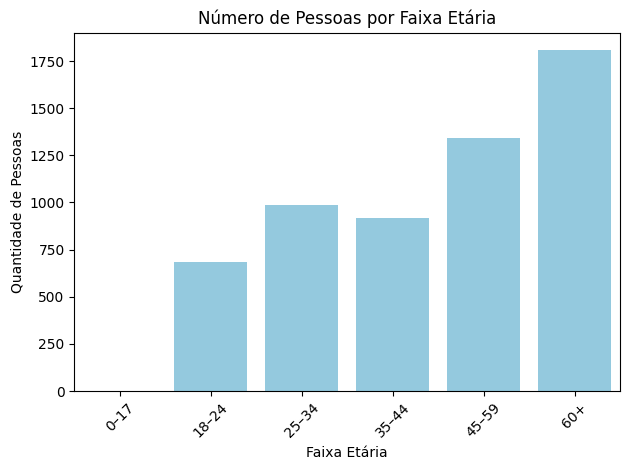

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
agrupada = df['faixa_etaria'].value_counts().sort_index().reset_index()
agrupada.columns = ['faixa_etaria', 'quantidade']


sns.barplot(data=agrupada, x='faixa_etaria', y='quantidade', color='skyblue')
plt.title('Número de Pessoas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=45)  # gira os rótulos do eixo X se estiverem apertados
plt.tight_layout()
plt.show()

/tmp/ipython-input-100-4114170554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_BMI = df.groupby('faixa_etaria')['BMXBMI'].mean().reset_index()
/tmp/ipython-input-100-4114170554.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


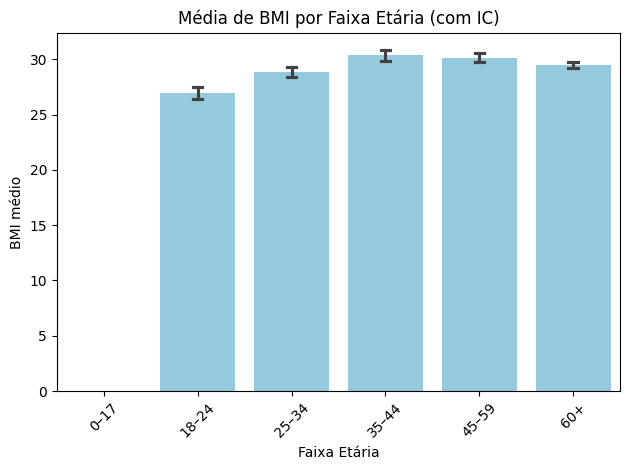

  faixa_etaria     BMXBMI
0         0–17        NaN
1        18–24  26.924292
2        25–34  28.888151
3        35–44  30.403194
4        45–59  30.147673
5          60+  29.487302


In [ ]:
media_BMI = df.groupby('faixa_etaria')['BMXBMI'].mean().reset_index()
media_BMI

sns.barplot(
    data=df,
    x='faixa_etaria',
    y='BMXBMI',
    ci=95,                  # mostra intervalo de confiança de 95% (padrão)
    capsize=0.1,            # coloca "tracinhos" nos erros (ICs)
    color='skyblue'         # cor da barra
)

plt.title('Média de BMI por Faixa Etária (com IC)')
plt.xlabel('Faixa Etária')
plt.ylabel('BMI médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print (media_BMI)